In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tanzania-tourism-prediction/SampleSubmission (7).csv
/kaggle/input/tanzania-tourism-prediction/Test (7).csv
/kaggle/input/tanzania-tourism-prediction/Train (14).csv


In [2]:
train=pd.read_csv('/kaggle/input/tanzania-tourism-prediction/Train (14).csv')
train

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


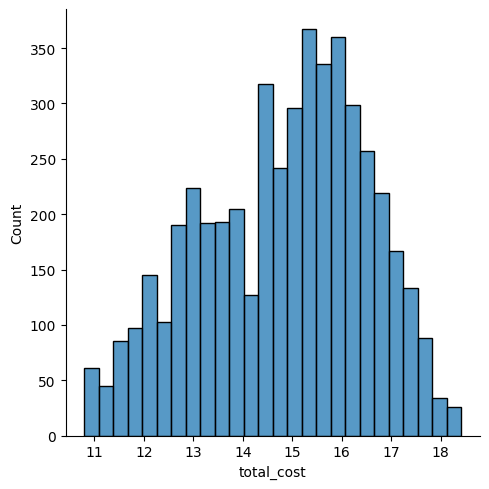

In [3]:
import seaborn as sns 
sns.displot(np.log(train["total_cost"]))

/tmp/ipykernel_33/2341273369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((train["total_cost"]**(1/3)))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_cost', ylabel='Density'>

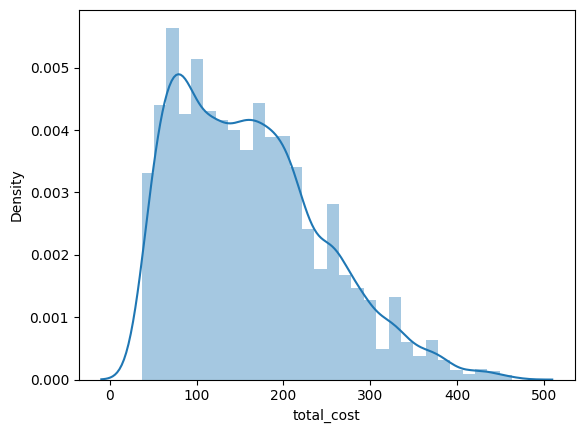

In [4]:
sns.distplot((train["total_cost"]**(1/3)))

In [5]:
test=pd.read_csv("/kaggle/input/tanzania-tourism-prediction/Test (7).csv")
test

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,NaN,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,No,1,0,Cash,No,NaN
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,10,5,Other,Yes,Wildlife
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,No,6,0,Cash,Yes,No comments
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,4,0,Cash,Yes,Wildlife


In [6]:
all_data=pd.concat([train,test])
all_data


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,NaN,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,1.0,0.0,Cash,No,NaN,NaN
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,10.0,5.0,Other,Yes,Wildlife,NaN
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,6.0,0.0,Cash,Yes,No comments,NaN
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,4.0,0.0,Cash,Yes,Wildlife,NaN


In [7]:
train['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [8]:
all_data2=all_data.drop(columns=["ID","total_cost"])
all_data2

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People
1,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature"
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People
4,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,UNITED STATES OF AMERICA,25-44,NaN,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,No,...,No,No,No,No,No,1.0,0.0,Cash,No,NaN
1597,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,No,...,Yes,Yes,Yes,No,No,10.0,5.0,Other,Yes,Wildlife
1598,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,No,...,No,No,No,No,No,6.0,0.0,Cash,Yes,No comments
1599,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,4.0,0.0,Cash,Yes,Wildlife


In [9]:
cat=all_data2.columns[all_data2.dtypes==object]
cat

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    all_data2[i]=le.fit_transform(all_data2[i])
    
all_data2

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,101,3,2,1.0,1.0,1,7,0,0,0,...,0,0,0,0,0,13.0,0.0,0,0,2
1,111,2,5,1.0,0.0,1,3,7,0,0,...,0,0,0,0,0,14.0,7.0,0,1,6
2,111,2,0,0.0,1.0,5,3,0,0,0,...,0,0,0,0,0,1.0,31.0,0,0,1
3,111,2,3,1.0,1.0,1,7,5,1,0,...,1,1,1,1,0,11.0,0.0,0,1,2
4,17,0,5,1.0,0.0,1,7,5,0,0,...,0,0,0,0,0,7.0,4.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,112,2,5,0.0,1.0,2,6,1,0,0,...,0,0,0,0,0,1.0,0.0,0,0,7
1597,47,3,4,3.0,1.0,1,7,0,1,0,...,1,1,1,0,0,10.0,5.0,2,1,0
1598,32,2,0,0.0,1.0,2,6,0,0,0,...,0,0,0,0,0,6.0,0.0,0,1,4
1599,95,1,0,0.0,1.0,0,0,0,0,0,...,0,0,0,0,0,4.0,0.0,0,1,0


In [10]:
all_data2=all_data2.fillna(0)

In [11]:
train_2=all_data2[:len(train)]
test_2=all_data2[len(train):]
train_2

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,101,3,2,1.0,1.0,1,7,0,0,0,...,0,0,0,0,0,13.0,0.0,0,0,2
1,111,2,5,1.0,0.0,1,3,7,0,0,...,0,0,0,0,0,14.0,7.0,0,1,6
2,111,2,0,0.0,1.0,5,3,0,0,0,...,0,0,0,0,0,1.0,31.0,0,0,1
3,111,2,3,1.0,1.0,1,7,5,1,0,...,1,1,1,1,0,11.0,0.0,0,1,2
4,17,0,5,1.0,0.0,1,7,5,0,0,...,0,0,0,0,0,7.0,4.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,107,3,0,0.0,1.0,0,5,0,0,0,...,0,0,0,0,0,2.0,0.0,1,0,4
4805,112,2,3,1.0,1.0,1,7,5,1,1,...,1,1,1,1,1,11.0,0.0,0,1,2
4806,73,0,5,1.0,0.0,1,7,7,0,0,...,0,0,0,0,0,3.0,7.0,0,1,3
4807,95,2,2,1.0,1.0,0,0,5,0,1,...,1,0,0,0,0,5.0,0.0,1,0,2


In [12]:
#k-fold 교차검증 
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [21]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor

# KFold 인스턴스 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42)

result = 0
best_score = 0
cbc = CatBoostRegressor(verbose=100)

for train_index, valid_index in kf.split(train_2):
    x_train = train_2.iloc[train_index]
    x_valid = train_2.iloc[valid_index]
    # 타겟 변수에 로그 변환 적용
    y_train = np.log(train['total_cost'].iloc[train_index])
    y_valid = np.log(train['total_cost'].iloc[valid_index])
    cbc.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50)
    # 예측 값에 역변환 적용
    result += np.exp(cbc.predict(test_2)) / 5
    
result


Learning rate set to 0.062916
0:	learn: 1.6386644	test: 1.5986867	best: 1.5986867 (0)	total: 2.06ms	remaining: 2.06s
100:	learn: 1.0576645	test: 1.1142134	best: 1.1142134 (100)	total: 179ms	remaining: 1.6s
200:	learn: 1.0050732	test: 1.1067381	best: 1.1065533 (196)	total: 358ms	remaining: 1.42s
300:	learn: 0.9551751	test: 1.1024221	best: 1.1013514 (287)	total: 535ms	remaining: 1.24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.101026032
bestIteration = 318

Shrink model to first 319 iterations.
Learning rate set to 0.062916
0:	learn: 1.6384747	test: 1.6057106	best: 1.6057106 (0)	total: 2ms	remaining: 1.99s
100:	learn: 1.0544395	test: 1.1168293	best: 1.1168293 (100)	total: 189ms	remaining: 1.68s
200:	learn: 0.9988488	test: 1.1063574	best: 1.1063574 (200)	total: 368ms	remaining: 1.46s
300:	learn: 0.9537817	test: 1.1025592	best: 1.1024013 (288)	total: 552ms	remaining: 1.28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.102401252
bestIteration =

array([14674258.10437205,  5276397.34224496,  8805839.04089521, ...,
        1090642.86000298,   499023.2594376 ,  4404655.20394576])

In [19]:
sub=pd.read_csv("/kaggle/input/tanzania-tourism-prediction/SampleSubmission (7).csv")
sub

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0
...,...,...
1596,tour_988,0
1597,tour_990,0
1598,tour_992,0
1599,tour_996,0


In [23]:
sub["total_cost"]=result
sub

,ID,total_cost
0,tour_1,1.467426e+07
1,tour_100,5.276397e+06
2,tour_1001,8.805839e+06
3,tour_1006,1.726051e+06
4,tour_1009,1.616077e+07
...,...,...
1596,tour_988,4.105329e+05
1597,tour_990,1.794392e+07
1598,tour_992,1.090643e+06
1599,tour_996,4.990233e+05


In [24]:
sub.to_csv("sub123.csv",index=0)